## Food Distribution at Islamic Family Project

Islamic Family distributes food hampers to the people in need, but it is hard for them to
know that which clients will come back to them. As they don’t know who will come back
that’s why they can’t plan resources properly and it leads to the food wastage and missed
chances to help those at risk of not returning.

This problem is worth solving as it identifies

1.) Clients who will not return so that they can be supported.

2.) It ensures there is less wastage of food and better distribution.

3.) It keeps record that food hampers are available to those people who need it.

4.)
It helps the organization to plan things and services in proper way.

The business values hypothesis is that data-driven predictions will enable better planning,
reduced operational costs, and improved service accessibility. The beneficiaries include
Islamic Family staff, volunteers, and community partners who work to improve food
security and long-term support for clients.

**The model addresses unpredictable client return rates, improving efficiency and accessibility.**

This project builds a classification model to predict
Client retention -

1.   Client Interactions – Appointment contact, scheduling, pickup history.
2.   Food Hamper Details – Type, confirmation status, quantity
3.   Engagement Data – Event participation, outreach response  
4.   Historical Trends – Frequency of past visits.

Potential ML Models: The model’s accuracy could be calculated by comparing actual vs predicted client returns

F1-score ensures high recall and precision, preventing missed outreach
opportunities due to imbalanced data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_distances = pd.read_csv("processed_data_with_distances.csv")

In [3]:
df_distances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   agent_related           15930 non-null  object 
 1   collect_scheduled_date  15930 non-null  object 
 2   collect_token           15930 non-null  object 
 3   datetime_from           15930 non-null  object 
 4   pickup_date             6919 non-null   object 
 5   pickup_location         15930 non-null  object 
 6   quantity                15930 non-null  int64  
 7   related_scheduler       15930 non-null  object 
 8   title                   15930 non-null  object 
 9   unique_client           15930 non-null  object 
 10  Creation Date_x         15930 non-null  object 
 11  Modified Date_x         15930 non-null  object 
 12  unique id               15930 non-null  object 
 13  address                 15930 non-null  object 
 14  age                     15930 non-null

In [4]:
df_distances.head()

,agent_related,collect_scheduled_date,collect_token,datetime_from,pickup_date,pickup_location,quantity,related_scheduler,title,unique_client,...,Modified Date_y,age_group,family_name,pickup_month,pickup_day,latitude,longitude,distance_km,pickup_latitude,pickup_longitude
0,1658438468381x917903915060866600,2023-08-22 00:00:00,FSG8B6,2023-08-22 00:00:00,2023-08-22 10:45:00,1689345971878x737827531391241900,1,0,Raj (Pedro's whatsapp) New Hamper,1689345689019x623399745786478600,...,2024-08-22 13:21:00,36-60,Family 1,8.0,22.0,53.548663,-113.506106,0.000000,53.548663,-113.506106
1,1692817605423x553205290319266560,2023-09-07 03:00:00,MOPH4Z,2023-09-07 03:00:00,2023-09-07 17:37:00,1689345971878x737827531391241900,1,1694118960395x197586616473878530,Abdulhalim's Hamper,1694115474357x134699341188431870,...,2024-08-22 12:31:00,36-60,Family 2,9.0,7.0,53.608420,-113.460920,7.293171,53.548663,-113.506106
2,1692817605423x553205290319266560,2023-10-07 03:00:00,ZBGPY9,2023-10-07 03:00:00,NaN,1689345971878x737827531391241900,1,1694118960395x197586616473878530,Abdulhalim's Hamper,1694115474357x134699341188431870,...,2024-08-22 12:31:00,36-60,Family 2,10.0,7.0,53.608420,-113.460920,7.293171,53.548663,-113.506106
3,1692817605423x553205290319266560,2023-11-07 04:00:00,BYF4VF,2023-11-07 04:00:00,2023-11-07 15:59:00,1689345971878x737827531391241900,1,1694118960395x197586616473878530,Abdulhalim's Hamper,1694115474357x134699341188431870,...,2024-08-22 12:31:00,36-60,Family 2,11.0,7.0,53.608420,-113.460920,7.293171,53.548663,-113.506106
4,1658438468381x917903915060866600,2023-09-12 03:00:00,JX5K6U,2023-09-12 03:00:00,2023-09-12 17:39:00,1689345971878x737827531391241900,1,1694550832077x791511992134795300,Sadek's Hamper,1694547419532x515953499649605600,...,2024-08-22 12:02:00,19-35,Family 3,9.0,12.0,53.411350,-113.524156,15.329190,53.548663,-113.506106


In [5]:
df_distances.dtypes

,0
agent_related,object
collect_scheduled_date,object
collect_token,object
datetime_from,object
pickup_date,object
pickup_location,object
quantity,int64
related_scheduler,object
title,object
unique_client,object


In [6]:
# Drop the data foe the scheduled date before november 2023
df_distances = df_distances[df_distances['collect_scheduled_date'] >= '2023-11-01']

In [7]:
df_distances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15883 entries, 3 to 15929
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   agent_related           15883 non-null  object 
 1   collect_scheduled_date  15883 non-null  object 
 2   collect_token           15883 non-null  object 
 3   datetime_from           15883 non-null  object 
 4   pickup_date             6879 non-null   object 
 5   pickup_location         15883 non-null  object 
 6   quantity                15883 non-null  int64  
 7   related_scheduler       15883 non-null  object 
 8   title                   15883 non-null  object 
 9   unique_client           15883 non-null  object 
 10  Creation Date_x         15883 non-null  object 
 11  Modified Date_x         15883 non-null  object 
 12  unique id               15883 non-null  object 
 13  address                 15883 non-null  object 
 14  age                     15883 non-null  flo

In [8]:
# Extract the months and days from the collected_schedule_date ans store in new column
# Convert 'collect_scheduled_date' to datetime if it's not already
df_distances['collect_scheduled_date'] = pd.to_datetime(df_distances['collect_scheduled_date'], errors='coerce')
df_distances['pickup_month'] = df_distances['collect_scheduled_date'].dt.month
df_distances['pickup_day'] = df_distances['collect_scheduled_date'].dt.day
# Convert to integer datatype
df_distances['pickup_month'] = df_distances['pickup_month'].astype(int)
df_distances['pickup_day'] = df_distances['pickup_day'].astype(int)

In [9]:
columns_to_drop = ['agent_related','family','datetime_from','related_scheduler','Creation Date_x','Modified Date_x','unique id','external_id','Creation Date_y','Modified Date_y','age','latitude','longitude','pickup_latitude','pickup_longitude','pickup_location','address']
df_distances = df_distances.drop(columns=columns_to_drop)

In [10]:
df_distances.dtypes

,0
collect_scheduled_date,datetime64[ns]
collect_token,object
pickup_date,object
quantity,int64
title,object
unique_client,object
dependents_qty,int64
household,object
preferred_languages,object
primary_contact,object


In [11]:
columns_to_convert = ['title','household','preferred_languages','Sex','status','age_group']
df_distances[columns_to_convert] = df_distances[columns_to_convert].astype('category')


In [12]:
df_distances.dtypes

,0
collect_scheduled_date,datetime64[ns]
collect_token,object
pickup_date,object
quantity,int64
title,category
unique_client,object
dependents_qty,int64
household,category
preferred_languages,category
primary_contact,object


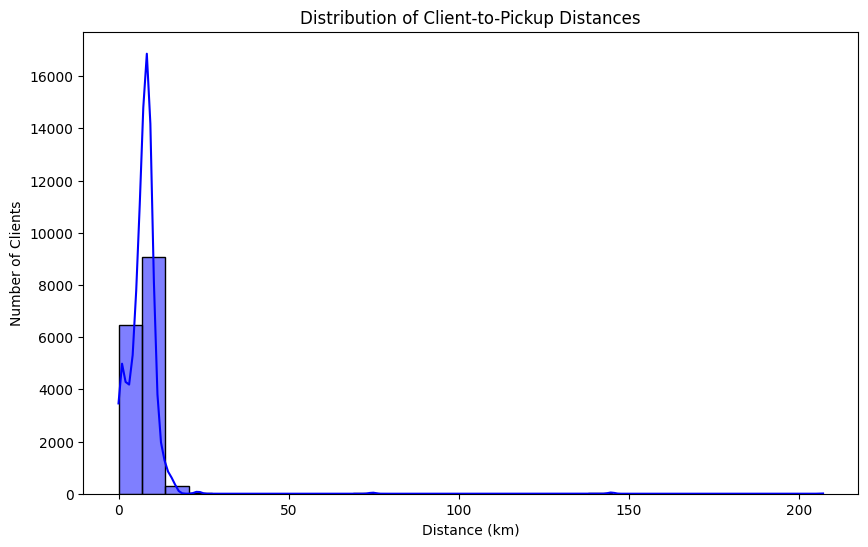

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_distances['distance_km'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Client-to-Pickup Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Clients")
plt.show()


In [14]:
df_distances.dtypes

,0
collect_scheduled_date,datetime64[ns]
collect_token,object
pickup_date,object
quantity,int64
title,category
unique_client,object
dependents_qty,int64
household,category
preferred_languages,category
primary_contact,object


In [15]:
df_distances.head()

,collect_scheduled_date,collect_token,pickup_date,quantity,title,unique_client,dependents_qty,household,preferred_languages,primary_contact,Sex,status,age_group,family_name,pickup_month,pickup_day,distance_km
3,2023-11-07 04:00:00,BYF4VF,2023-11-07 15:59:00,1,Abdulhalim's Hamper,1694115474357x134699341188431870,6,yes,Arabic,1694116977541x457443885172654100,Undefined,Active,36-60,Family 2,11,7,7.293171
7,2023-11-13 04:00:00,UYW02H,NaN,1,food hamper,1694630813849x163939988692795400,2,yes,Turkish,1694631770190x471709318317080600,Undefined,Active,19-35,Family 4,11,13,11.054895
8,2023-12-13 04:00:00,9IQ2X1,NaN,1,food hamper,1694630813849x163939988692795400,2,yes,Turkish,1694631770190x471709318317080600,Undefined,Active,19-35,Family 4,12,13,11.054895
9,2024-01-13 04:00:00,89SQQE,NaN,1,food hamper,1694630813849x163939988692795400,2,yes,Turkish,1694631770190x471709318317080600,Undefined,Active,19-35,Family 4,1,13,11.054895
10,2024-02-13 04:00:00,FCB9ED,NaN,1,food hamper,1694630813849x163939988692795400,2,yes,Turkish,1694631770190x471709318317080600,Undefined,Active,19-35,Family 4,2,13,11.054895


In [16]:
# Unique values of quantity
unique_values = df_distances['quantity'].unique()
print(unique_values)

[1]


#Creating Visualizations

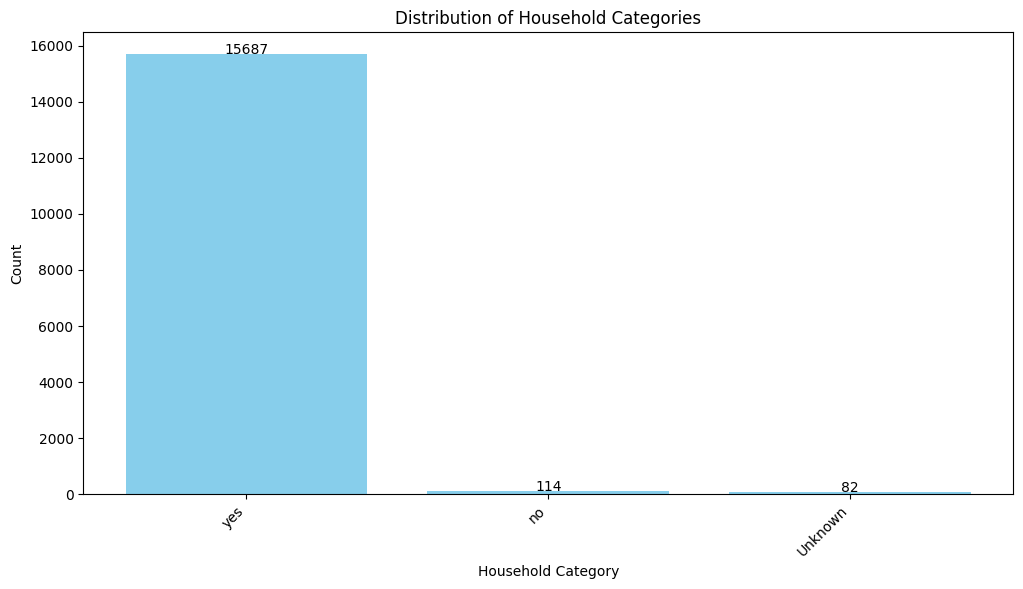

In [17]:
import matplotlib.pyplot as plt

# Checking if 'household' column exists in processed_data
if 'household' in df_distances.columns:
    # Counting all household occurrences, including missing values
    household_detail = df_distances['household'].astype(str).value_counts(dropna=False).reset_index()
    household_detail.columns = ['household', 'count']

    # Plotting the household distribution
    plt.figure(figsize=(12,6))
    plt.bar(household_detail['household'], household_detail['count'], color='skyblue')
    plt.xlabel("Household Category")
    plt.ylabel("Count")
    plt.title("Distribution of Household Categories")
    plt.xticks(rotation=45, ha='right')

    # Adding count labels on bars
    for index, value in enumerate(household_detail['count']):
        plt.text(index, value + 5, str(value), ha='center', fontsize=10)

    plt.show()
else:
    print("Column 'household' does not exist in merged_data.")


In [18]:
# Check missing values
print("Missing values count:")
print(df_distances.isnull().sum())


Missing values count:
collect_scheduled_date       0
collect_token                0
pickup_date               9004
quantity                     0
title                        0
unique_client                0
dependents_qty               0
household                    0
preferred_languages          0
primary_contact              0
Sex                          0
status                       0
age_group                    0
family_name                  0
pickup_month                 0
pickup_day                   0
distance_km                  0
dtype: int64


In [19]:
# Convert date columns to datetime
df_distances['collect_scheduled_date'] = pd.to_datetime(df_distances['collect_scheduled_date'], errors='coerce')
df_distances['pickup_date'] = pd.to_datetime(df_distances['pickup_date'], errors='coerce')

# Define reference date for analysis
latest_pickup_date = pd.to_datetime("2024-08-26")


#Days Since Last Visit (Scheduled vs Pickup)
days_since_last_visit (from scheduled visits)

days_since_last_pickup (from actual pickups)

In [20]:
# How long since their last scheduled visit
df_distances['days_since_last_visit'] = (latest_pickup_date - df_distances['collect_scheduled_date']).dt.days

# How long since their actual pickup
df_distances['days_since_last_pickup'] = (latest_pickup_date - df_distances['pickup_date']).dt.days


# Visit Count (Only Actual Pickups)


In [21]:
# Filter rows with an actual pickup
valid_pickups = df_distances.dropna(subset=['pickup_date'])

# Count total visits (pickups) per client
pickup_counts = valid_pickups.groupby('unique_client').size().reset_index(name='visit_count')

# Merge with the main data
df_distances = df_distances.merge(pickup_counts, on='unique_client', how='left')

# Handle NaNs (clients with no pickups yet)
df_distances['visit_count'] = df_distances['visit_count'].fillna(0).astype(int)


#Visits in the Last Year (from 2024-08-26)
Counts how many times a client picked up in the 365 days before 2024-08-26.



In [22]:
# Define cutoff dates
one_month_ago = latest_pickup_date - pd.DateOffset(months=1)
three_months_ago = latest_pickup_date - pd.DateOffset(months=3)
six_months_ago = latest_pickup_date - pd.DateOffset(months=6)

# Filter pickups within each timeframe
recent_pickups_1m = valid_pickups[valid_pickups['pickup_date'] >= one_month_ago]
recent_pickups_3m = valid_pickups[valid_pickups['pickup_date'] >= three_months_ago]
recent_pickups_6m = valid_pickups[valid_pickups['pickup_date'] >= six_months_ago]

# Count visits per client
pickup_counts_1m = recent_pickups_1m.groupby('unique_client').size().reset_index(name='visits_last_1m')
pickup_counts_3m = recent_pickups_3m.groupby('unique_client').size().reset_index(name='visits_last_3m')
pickup_counts_6m = recent_pickups_6m.groupby('unique_client').size().reset_index(name='visits_last_6m')

# Merge into main dataframe
df_distances = df_distances.merge(pickup_counts_1m, on='unique_client', how='left')
df_distances = df_distances.merge(pickup_counts_3m, on='unique_client', how='left')
df_distances = df_distances.merge(pickup_counts_6m, on='unique_client', how='left')

# Fill NaNs with 0
df_distances[[ 'visits_last_1m','visits_last_3m', 'visits_last_6m']] = (
    df_distances[[ 'visits_last_1m','visits_last_3m', 'visits_last_6m']].fillna(0).astype(int)
)


# Client Returned Flags
Two Labels:
client_returned: Has the client ever returned (more than 1 pickup)?

recent_returned: Has the client returned within the last 180 days of 2024-08-26?

In [23]:
# Ever returned (more than 1 pickup)
df_distances['client_returned'] = (df_distances['visit_count'] > 1).astype(int)

# Returned within timeframes (recent_returned for 3, 6, 12 months)
df_distances['recent_returned_1m'] = (df_distances['visits_last_1m'] > 0).astype(int)
df_distances['recent_returned_3m'] = (df_distances['visits_last_3m'] > 0).astype(int)
df_distances['recent_returned_6m'] = (df_distances['visits_last_6m'] > 0).astype(int)


In [24]:
print(df_distances['client_returned'].value_counts())


client_returned
1    14914
0      969
Name: count, dtype: int64


In [25]:
print(df_distances['recent_returned_1m'].value_counts())

recent_returned_1m
1    10346
0     5537
Name: count, dtype: int64


In [26]:
print(df_distances['recent_returned_3m'].value_counts())


recent_returned_3m
1    13666
0     2217
Name: count, dtype: int64


In [27]:
print(df_distances['recent_returned_6m'].value_counts())


recent_returned_6m
1    14931
0      952
Name: count, dtype: int64


# Missed Pickup Flag
Clients who scheduled but didn’t actually show up.



In [28]:
# Scheduled but didn't pick up
df_distances['missed_pickup'] = df_distances['pickup_date'].isna().astype(int)

# Optional: Scheduled but missed (they had a scheduled date but never picked up)
df_distances['scheduled_but_missed'] = df_distances['collect_scheduled_date'].notna() & df_distances['pickup_date'].isna()


In [29]:
print(df_distances['missed_pickup'].value_counts())


missed_pickup
1    9004
0    6879
Name: count, dtype: int64


# Future Scheduled Dates
Track future scheduled pickups beyond 2024-08-26.



In [30]:
# Scheduled pickup is in the future from your cutoff
df_distances['is_future_scheduled'] = df_distances['collect_scheduled_date'] > latest_pickup_date


In [31]:
print(df_distances['is_future_scheduled'].value_counts())


is_future_scheduled
False    9674
True     6209
Name: count, dtype: int64


# Schedule-Pickup Gap
Analyze how punctual clients are (difference between scheduled and actual pickup dates).



In [32]:
# Days between scheduled and actual pickup (if both exist)
df_distances['schedule_pickup_gap_days'] = (
    (df_distances['pickup_date'] - df_distances['collect_scheduled_date']).dt.days
)


In [33]:
print(df_distances['schedule_pickup_gap_days'].value_counts())


schedule_pickup_gap_days
 0.0     2181
-1.0      715
 2.0      385
 1.0      372
 3.0      340
         ... 
-58.0       1
-95.0       1
-65.0       1
 52.0       1
-54.0       1
Name: count, Length: 128, dtype: int64


# Seasonality & Time Features


In [34]:
df_distances['scheduled_month'] = df_distances['collect_scheduled_date'].dt.month
df_distances['pickup_month'] = df_distances['pickup_date'].dt.month

df_distances['scheduled_weekday'] = df_distances['collect_scheduled_date'].dt.day_name()
df_distances['pickup_weekday'] = df_distances['pickup_date'].dt.day_name()


In [35]:
df_distances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15883 entries, 0 to 15882
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   collect_scheduled_date    15883 non-null  datetime64[ns]
 1   collect_token             15883 non-null  object        
 2   pickup_date               6879 non-null   datetime64[ns]
 3   quantity                  15883 non-null  int64         
 4   title                     15883 non-null  category      
 5   unique_client             15883 non-null  object        
 6   dependents_qty            15883 non-null  int64         
 7   household                 15883 non-null  category      
 8   preferred_languages       15883 non-null  category      
 9   primary_contact           15883 non-null  object        
 10  Sex                       15883 non-null  category      
 11  status                    15883 non-null  category      
 12  age_group         

In [36]:
# Download the csv
df_distances.to_csv('Processed_data_latest.csv', index=False)

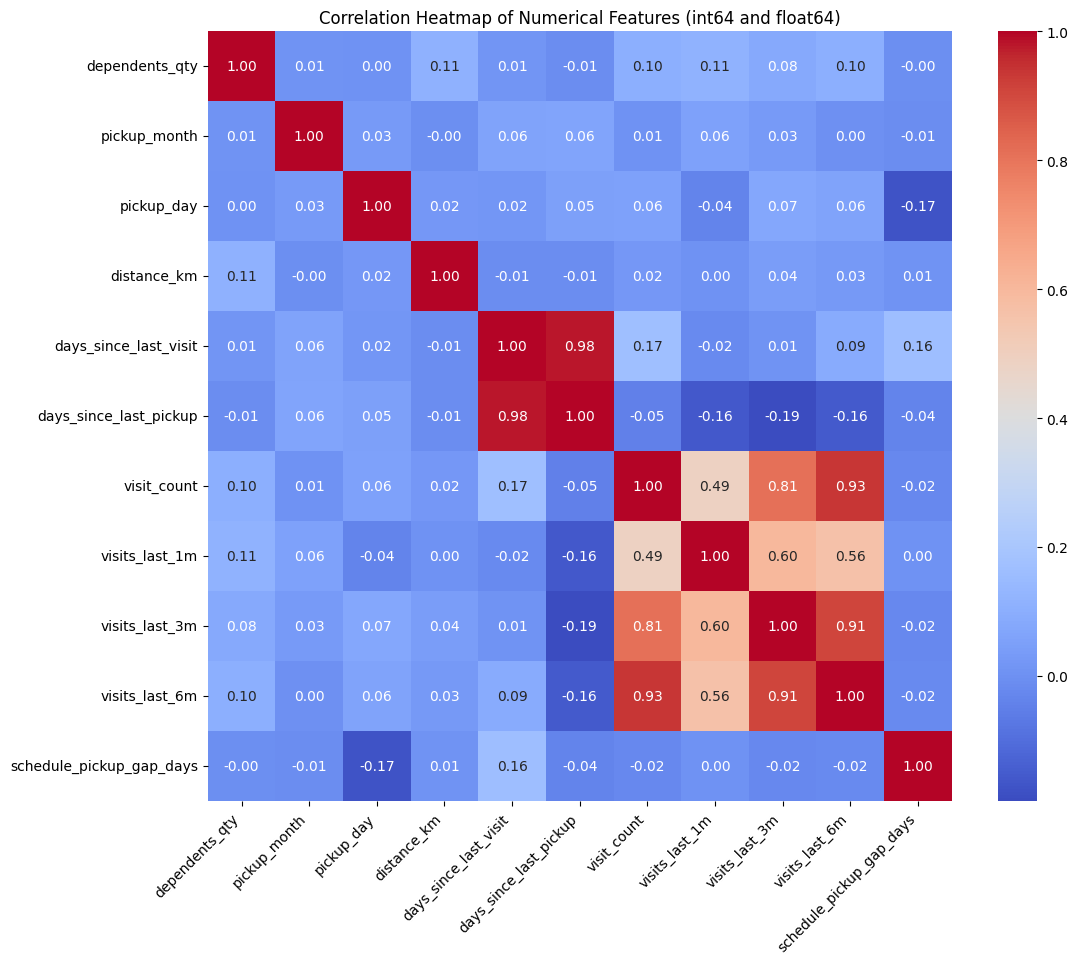

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features by data type
heatmap_features = df_distances.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove specific columns if needed
columns_to_exclude = ['unique_client', 'client_returned', 'recent_returned_3m',
                      'recent_returned_6m', 'recent_returned_1m', 'missed_pickup','quantity']
heatmap_features = [col for col in heatmap_features if col not in columns_to_exclude]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_distances[heatmap_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features (int64 and float64)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [38]:
# Download the csv
df_distances.to_csv('Processed_data_latest.csv', index=False)

🔹 Client Engagement Levels:
client_engagement
Occasional    11815
Inactive       2217
Rare           1302
Frequent        549
Name: count, dtype: int64


<ipython-input-39-d79c2148d138>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")


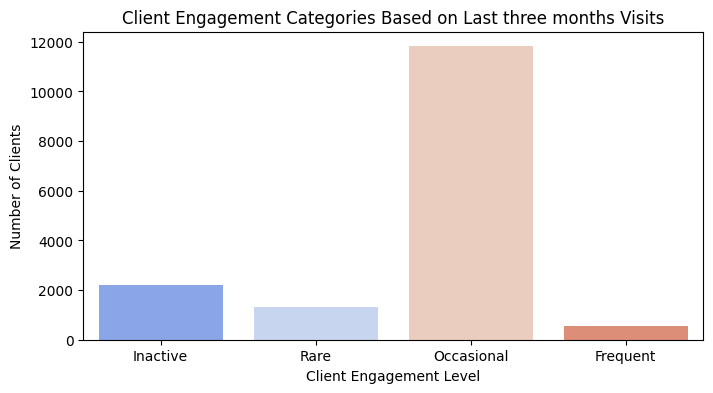

In [39]:
# Define categories based on visit frequency
def categorize_client(visits):
    if visits == 0:
        return "Inactive"
    elif visits == 1:
        return "Rare"
    elif visits <= 5:
        return "Occasional"
    else:
        return "Frequent"

# Apply the function to create a new column
df_distances['client_engagement'] = df_distances['visits_last_3m'].apply(categorize_client)

# Check the distribution
print("🔹 Client Engagement Levels:")
print(df_distances['client_engagement'].value_counts())

# Visualizing the engagement categories
plt.figure(figsize=(8,4))
sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")
plt.title("Client Engagement Categories Based on Last three months Visits")
plt.xlabel("Client Engagement Level")
plt.ylabel("Number of Clients")
plt.show()


🔹 Client Engagement Levels:
client_engagement
Frequent      8389
Occasional    5761
Inactive       952
Rare           781
Name: count, dtype: int64


<ipython-input-40-a3f05b71f27d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")


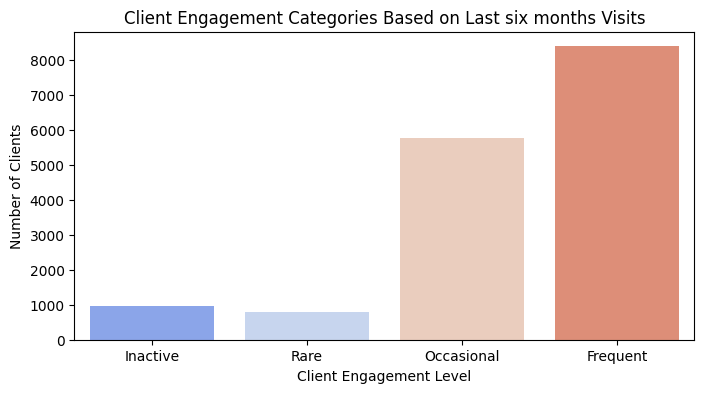

In [40]:
# Define categories based on visit frequency
def categorize_client(visits):
    if visits == 0:
        return "Inactive"
    elif visits == 1:
        return "Rare"
    elif visits <= 5:
        return "Occasional"
    else:
        return "Frequent"

# Apply the function to create a new column
df_distances['client_engagement'] = df_distances['visits_last_6m'].apply(categorize_client)

# Check the distribution
print("🔹 Client Engagement Levels:")
print(df_distances['client_engagement'].value_counts())

# Visualizing the engagement categories
plt.figure(figsize=(8,4))
sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")
plt.title("Client Engagement Categories Based on Last six months Visits")
plt.xlabel("Client Engagement Level")
plt.ylabel("Number of Clients")
plt.show()


🔹 Client Engagement Levels:
client_engagement
Rare          9665
Inactive      5537
Occasional     681
Name: count, dtype: int64


<ipython-input-41-64029d97b4a1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")


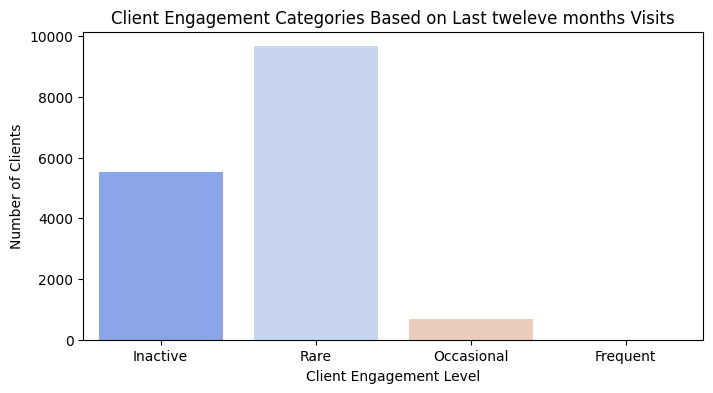

In [41]:
# Define categories based on visit frequency
def categorize_client(visits):
    if visits == 0:
        return "Inactive"
    elif visits == 1:
        return "Rare"
    elif visits <= 5:
        return "Occasional"
    else:
        return "Frequent"

# Apply the function to create a new column
df_distances['client_engagement'] = df_distances['visits_last_1m'].apply(categorize_client)

# Check the distribution
print("🔹 Client Engagement Levels:")
print(df_distances['client_engagement'].value_counts())

# Visualizing the engagement categories
plt.figure(figsize=(8,4))
sns.countplot(x=df_distances['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")
plt.title("Client Engagement Categories Based on Last tweleve months Visits")
plt.xlabel("Client Engagement Level")
plt.ylabel("Number of Clients")
plt.show()


In [42]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Client_Geocode").getOrCreate()

# Load the processed dataset
df = spark.read.csv("Processed_data_latest.csv", header=True, inferSchema=True)

# Show dataset sample
df.show(5)


+----------------------+-------------+-------------------+--------+-------------------+--------------------+--------------+---------+-------------------+--------------------+---------+------+---------+-----------+------------+----------+-----------------+---------------------+----------------------+-----------+--------------+--------------+--------------+---------------+------------------+------------------+------------------+-------------+--------------------+-------------------+------------------------+---------------+-----------------+--------------+
|collect_scheduled_date|collect_token|        pickup_date|quantity|              title|       unique_client|dependents_qty|household|preferred_languages|     primary_contact|      Sex|status|age_group|family_name|pickup_month|pickup_day|      distance_km|days_since_last_visit|days_since_last_pickup|visit_count|visits_last_1m|visits_last_3m|visits_last_6m|client_returned|recent_returned_1m|recent_returned_3m|recent_returned_6m|missed_pic

# Feature Importance

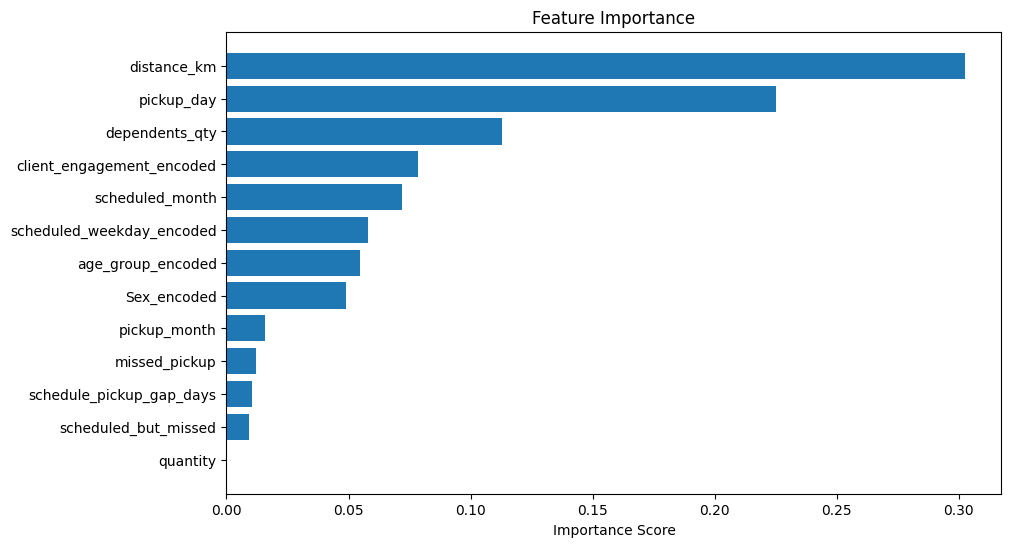

,Feature,Importance
5,distance_km,0.302353
2,pickup_day,0.225251
6,dependents_qty,0.112920
8,client_engagement_encoded,0.078481
3,scheduled_month,0.071895
4,scheduled_weekday_encoded,0.057888
9,age_group_encoded,0.054693
10,Sex_encoded,0.048992
1,pickup_month,0.015728
0,missed_pickup,0.012171


In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Categorical encoding for categorical variables (if not already encoded)
df_distances['client_engagement_encoded'] = df_distances['client_engagement'].astype('category').cat.codes
df_distances['age_group_encoded'] = df_distances['age_group'].astype('category').cat.codes
df_distances['Sex_encoded'] = df_distances['Sex'].astype('category').cat.codes
df_distances['scheduled_weekday_encoded'] = df_distances['scheduled_weekday'].astype('category').cat.codes

# Create scheduled_but_missed flag (historical no-shows only)
df_distances['scheduled_but_missed'] = df_distances['collect_scheduled_date'].notna() & df_distances['pickup_date'].isna()

# Create schedule_pickup_gap_days (historical gaps only)
df_distances['schedule_pickup_gap_days'] = (df_distances['pickup_date'] - df_distances['collect_scheduled_date']).dt.days

# ✅ SAFE FEATURES (avoiding potential leakage)
safe_features = [
    'missed_pickup',                   # Past missed pickups only
    'pickup_month',                    # Month of past pickups
    'pickup_day',                      # Day of past pickups
    'scheduled_month',                 # Month scheduled in past pickups
    'scheduled_weekday_encoded',       # Day of week scheduled in past pickups
    'distance_km',                     # Distance to client
    'dependents_qty',                  # Household dependents
    'quantity',                        # Quantity of past pickups (not future)
    'client_engagement_encoded',       # Encoded engagement based on past behavior
    'age_group_encoded',               # Age group encoded
    'Sex_encoded',                     # Gender encoded
    'scheduled_but_missed',            # Past no-shows (historical)
    'schedule_pickup_gap_days'         # Days between scheduled and pickup in history
]

# Prepare feature matrix X and target y
X_safe = df_distances[safe_features].fillna(0)

# Choose the appropriate target: client_returned or recent_returned
y_safe = df_distances['client_returned']  # Or use 'recent_returned' depending on your goal

# Split data into training and testing sets (80% train, 20% test)
X_train_safe, X_test_safe, y_train_safe, y_test_safe = train_test_split(X_safe, y_safe, test_size=0.2, random_state=42)

# Train a RandomForestClassifier for feature importance analysis
rf_safe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_safe.fit(X_train_safe, y_train_safe)

# Get feature importances from the trained model
safe_importances = rf_safe.feature_importances_

# Create a DataFrame to view feature importances
safe_feat_importance_df = pd.DataFrame({
    'Feature': safe_features,
    'Importance': safe_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(safe_feat_importance_df['Feature'], safe_feat_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Display sorted feature importance DataFrame
safe_feat_importance_df


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# OPTION 1 (Exclude client_engagement_encoded)
features_no_engagement = [
    'missed_pickup',
    'pickup_month',
    'pickup_day',
    'scheduled_month',
    'scheduled_weekday_encoded',
    'distance_km',
    'dependents_qty',
    'quantity',
    'age_group_encoded',
    'Sex_encoded',
    'scheduled_but_missed',
    'schedule_pickup_gap_days'
]

# OPTION 2 (Include client_engagement_encoded)
features_with_engagement = features_no_engagement + ['client_engagement_encoded']

# Prepare datasets
X1 = df_distances[features_no_engagement].fillna(0)
X2 = df_distances[features_with_engagement].fillna(0)
y = df_distances['client_returned']  # or 'recent_returned'

# Train-test split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train and evaluate both models
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X1_train, y_train)
y1_pred = rf1.predict(X1_test)

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X2_train, y_train)
y2_pred = rf2.predict(X2_test)

# Evaluate
print("=== Model WITHOUT client_engagement_encoded ===")
print("Accuracy:", accuracy_score(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

print("\n=== Model WITH client_engagement_encoded ===")
print("Accuracy:", accuracy_score(y_test, y2_pred))
print(classification_report(y_test, y2_pred))


=== Model WITHOUT client_engagement_encoded ===
Accuracy: 0.9653761410135347
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       193
           1       0.97      1.00      0.98      2984

    accuracy                           0.97      3177
   macro avg       0.93      0.74      0.81      3177
weighted avg       0.96      0.97      0.96      3177


=== Model WITH client_engagement_encoded ===
Accuracy: 0.9804847340258105
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       193
           1       0.98      1.00      0.99      2984

    accuracy                           0.98      3177
   macro avg       0.96      0.86      0.90      3177
weighted avg       0.98      0.98      0.98      3177



## There are chances that client_engagenment is causing overfitting or data leakage so we exclude it


# ML Modelling

## Preprocessing and select the Top 6 Important Features

In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')


In [46]:
selected_features = [
    'distance_km',
    'pickup_day',
    'dependents_qty',
    'age_group_encoded',
    'scheduled_month',
    'scheduled_weekday_encoded'
]

X = df_distances[selected_features].fillna(0)

# Targets for 3m, 6m, and 12m return
y_targets = {
    '1m': df_distances['recent_returned_1m'],
    '3m': df_distances['recent_returned_3m'],
    '6m': df_distances['recent_returned_6m'],
}


In [47]:
def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    print(f"Cross-Validated F1 Scores: {cv_scores}")
    print(f"Mean F1 Score: {cv_scores.mean()}")


In [48]:
def split_and_resample(X, y):
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Random undersampling to balance the classes
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

    print(f"Resampled Train Set Class Distribution:\n{pd.Series(y_train_res).value_counts()}")

    return X_train_res, X_test, y_train_res, y_test


## Model Training & Hyperparameter Tuning Function

We'll define a single function to:

1. Run GridSearchCV

2. Train and evaluate each model

3. Print metrics

In [49]:
def train_and_tune_models(X_train, X_test, y_train, y_test, timeframe):
    print(f"\n=== {timeframe.upper()} Return Prediction ===\n")

    #############################
    # RANDOM FOREST CLASSIFIER
    #############################
    rf_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced']
    }

    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    print("\nBest Params - Random Forest:", rf_grid.best_params_)
    cross_validate_model(rf_grid.best_estimator_, X_train, y_train)

    y_pred_rf = rf_grid.predict(X_test)

    print("\nRandom Forest Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    #############################
    # LOGISTIC REGRESSION
    #############################
    lr_param_grid = {
        'C': [0.01, 0.1, 1],
        'penalty': ['l2'],
        'solver': ['liblinear'],
        'class_weight': ['balanced']
    }

    lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=3, scoring='f1', n_jobs=-1)
    lr_grid.fit(X_train, y_train)

    print("\nBest Params - Logistic Regression:", lr_grid.best_params_)
    cross_validate_model(lr_grid.best_estimator_, X_train, y_train)

    y_pred_lr = lr_grid.predict(X_test)

    print("\nLogistic Regression Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_lr))
    print(classification_report(y_test, y_pred_lr))

    #############################
    # XGBOOST CLASSIFIER
    #############################
    xgb_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'scale_pos_weight': [1, (y_train.value_counts()[0] / y_train.value_counts()[1])],
        'subsample': [0.5, 0.8],
        'colsample_bytree': [0.5, 0.8],
        'min_child_weight': [5, 10]
    }

    xgb_grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                            xgb_param_grid, cv=3, scoring='f1', n_jobs=-1)

    xgb_grid.fit(X_train, y_train)

    print("\nBest Params - XGBoost:", xgb_grid.best_params_)
    cross_validate_model(xgb_grid.best_estimator_, X_train, y_train)

    y_pred_xgb = xgb_grid.predict(X_test)

    print("\nXGBoost Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

    #############################
    # OPTIONAL: Return best models
    #############################
    return rf_grid.best_estimator_, lr_grid.best_estimator_, xgb_grid.best_estimator_


In [50]:
trained_models = {}

for timeframe, y in y_targets.items():
    # Split and resample
    X_train, X_test, y_train, y_test = split_and_resample(X, y)

    # Train and tune models
    rf_model, lr_model, xgb_model = train_and_tune_models(X_train, X_test, y_train, y_test, timeframe)

    # Save models (optional)
    trained_models[timeframe] = {
        'RandomForest': rf_model,
        'LogisticRegression': lr_model,
        'XGBoost': xgb_model
    }


Resampled Train Set Class Distribution:
recent_returned_1m
0    4429
1    4429
Name: count, dtype: int64

=== 1M Return Prediction ===


Best Params - Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validated F1 Scores: [0.78703186 0.79587405 0.7953668  0.80872483 0.80356149]
Mean F1 Score: 0.7981118060553708

Random Forest Results:
Accuracy: 0.8051621026125275
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1108
           1       0.87      0.83      0.85      2069

    accuracy                           0.81      3177
   macro avg       0.79      0.80      0.79      3177
weighted avg       0.81      0.81      0.81      3177


Best Params - Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Cross-Validated F1 Scores: [0.53512881 0.54545455 0.54524628 0.56647399 0.56142365]
Mean F1 Score: 0.5507454535390781

Logistic R

In [51]:
import joblib

# Save models to files
for timeframe, models in trained_models.items():
    for model_name, model in models.items():
        filename = f'{timeframe}_{model_name}.pkl'
        joblib.dump(model, filename)
        print(f"Saved {filename}")


Saved 1m_RandomForest.pkl
Saved 1m_LogisticRegression.pkl
Saved 1m_XGBoost.pkl
Saved 3m_RandomForest.pkl
Saved 3m_LogisticRegression.pkl
Saved 3m_XGBoost.pkl
Saved 6m_RandomForest.pkl
Saved 6m_LogisticRegression.pkl
Saved 6m_XGBoost.pkl


#Summary of Model Results


🔹 1-Month Return Prediction

| Model               | CV F1 Score | Accuracy | Key Observations                                                                 |
|---------------------|-------------|----------|----------------------------------------------------------------------------------|
| Random Forest       |     0.80    |  80.52%  | Strong recall for both classes, balanced overall.                                |
|                     |             |          | Precision for non-returners: 70%, returners: 87%.                               |
|                     |             |          | Good general performance.                                                       |
| XGBoost ✅           |     0.83    |  83.82%  | High recall (85%) and precision (91%) for returners.                            |
|                     |             |          | Better precision for non-returners (73%) than RF.                               |
|                     |             |          | Best performance overall for 1M prediction.                                     |
| Logistic Regression |     0.55    |  55.43%  | Weak performance, struggles with predicting non-returners.                      |
|                     |             |          | Low precision (40%) and recall (57%) for non-returners.                         |
|                     |             |          | Not recommended for this timeframe.                                             |


🔹 3-Month Return Prediction

| Model               | CV F1 Score | Accuracy | Key Observations                                                                 |
|---------------------|-------------|----------|----------------------------------------------------------------------------------|
| Random Forest       |     0.82    |  81.49%  | Strong recall for non-returners (91%).                                          |
|                     |             |          | Precision for non-returners lower (42%), but solid returner metrics (98% / 80%).|
|                     |             |          | Balanced, but favors returners slightly.                                        |
| XGBoost ✅           |     0.85    |  85.80%  | Higher precision (50%) and recall (91%) for non-returners compared to RF.       |
|                     |             |          | Excellent precision and recall for returners (98% / 85%).                       |
|                     |             |          | Best class balance and overall performance for 3M prediction.                   |
| Logistic Regression |     0.60    |  61.69%  | Struggles with non-returners (19% precision, 54% recall).                       |
|                     |             |          | Underperforms, especially in predicting class 0.                                |



🔹 6-Month Return Prediction

| Model               | CV F1 Score | Accuracy | Key Observations                                                               |
|---------------------|-------------|----------|--------------------------------------------------------------------------------|
| Random Forest       |     0.85    |  82.66%  | Very high recall for non-returners (96%), but low precision (25%).             |
|                     |             |          | Strong for returners (100% precision, 82% recall).                             |
|                     |             |          | Good for recall-focused use cases.                                             |
| XGBoost ✅           |     0.88    |  83.79%  | Similar recall to RF (95%+), but better balance.                               |
|                     |             |          | Precision for non-returners (26%), excellent for returners (100% / 83%).       |
|                     |             |          | Best performance on 6M return prediction overall.                              |
| Logistic Regression |     0.63    |  67.61%  | Weak recall and precision on non-returners.                                    |
|                     |             |          | Underperforms, not recommended for long-term prediction.                       |


✅ Key Takeaways

🔹 XGBoost consistently outperforms Random Forest and Logistic Regression across all timeframes, especially with better class balance and higher precision-recall trade-offs.

🔹 Random Forest delivers high recall, particularly for non-returners, making it
useful if catching non-returners is critical.

🔹 Logistic Regression struggles, especially with imbalanced data and class 0 predictions. It is not recommended in its current state.

# SMOTE Integration

In [52]:
from imblearn.over_sampling import SMOTE

# Function for SMOTE Resampling
def split_and_resample_smote(X, y):
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # SMOTE Oversampling
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f"SMOTE Resampled Train Set Class Distribution:\n{pd.Series(y_train_res).value_counts()}")

    return X_train_res, X_test, y_train_res, y_test


# Train models with SMOTE
trained_models_smote = {}

for timeframe, y in y_targets.items():
    print(f"\n\n🚀 Starting SMOTE Model Training for {timeframe.upper()}...\n")

    # Split and resample with SMOTE
    X_train, X_test, y_train, y_test = split_and_resample_smote(X, y)

    # Train and tune models (using your existing function)
    rf_model, lr_model, xgb_model = train_and_tune_models(X_train, X_test, y_train, y_test, timeframe)

    # Save models (optional)
    trained_models_smote[timeframe] = {
        'RandomForest': rf_model,
        'LogisticRegression': lr_model,
        'XGBoost': xgb_model
    }


# Optional: Save SMOTE models
import joblib

for timeframe, models in trained_models_smote.items():
    for model_name, model in models.items():
        filename = f"{timeframe}_{model_name}_smote.pkl"
        joblib.dump(model, filename)
        print(f"Saved {filename}")




🚀 Starting SMOTE Model Training for 1M...

SMOTE Resampled Train Set Class Distribution:
recent_returned_1m
1    8277
0    8277
Name: count, dtype: int64

=== 1M Return Prediction ===


Best Params - Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validated F1 Scores: [0.80927536 0.81565878 0.82468694 0.82321587 0.81382979]
Mean F1 Score: 0.8173333482887326

Random Forest Results:
Accuracy: 0.8161787850173119
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1108
           1       0.87      0.85      0.86      2069

    accuracy                           0.82      3177
   macro avg       0.80      0.80      0.80      3177
weighted avg       0.82      0.82      0.82      3177


Best Params - Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Cross-Validated F1 Scores: [0.56882888 0.58952216 0.5769697  0.59079602 0.5899

#Summary of Model Results


🔹 1-Month Return Prediction (SMOTE)

| Model               | CV F1 Score | Accuracy | Key Observations                                           |
|---------------------|-------------|----------|-----------------------------------------------------------|
| Random Forest       |     0.82    |  81.62%  | Balanced recall/precision, strong performance overall.    |
| XGBoost ✅           |     0.82    |  83.95%  | Best precision (90%) for returners, good balance.         |
| Logistic Regression |     0.58    |  56.15%  | Struggles, low precision/recall for non-returners.        |


🔹 3-Month Return Prediction (SMOTE)

| Model               | CV F1 Score | Accuracy | Key Observations                                               |
|---------------------|-------------|----------|---------------------------------------------------------------|
| Random Forest       |     0.84    |  79.91%  | High recall for returners (95%), moderate for non-returners.  |
| XGBoost ✅           |     0.87    |  86.28%  | Strong balance, 97% precision for returners, 85% recall.      |
| Logistic Regression |     0.65    |  64.78%  | Weak recall for non-returners, underperforms overall.         |

🔹 6-Month Return Prediction (SMOTE)

| Model               | CV F1 Score | Accuracy | Key Observations                                              |
|---------------------|-------------|----------|--------------------------------------------------------------|
| Random Forest       |     0.89    |  85.01%  | Good recall (79%) for non-returners, high precision returners. |
| XGBoost ✅           |     0.94    |  91.75%  | Best recall (93%) and precision for both classes.            |
| Logistic Regression |     0.68    |  71.95%  | Poor precision/recall for non-returners.                     |

✅ Summary

- XGBoost with SMOTE outperforms all models across 1M, 3M, and 6M return predictions.

- Random Forest performs well but falls slightly behind XGBoost in balancing precision and recall.

- Logistic Regression underperforms, especially on minority classes (non-returners).

- SMOTE effectively balances class distributions but further improvements can be made by threshold tuning or cost-sensitive learning.



# Best Models (Per Timeframe)

| Timeframe | Best Model (Method) | CV F1 Score | Test Accuracy |
|-----------|---------------------|-------------|---------------|
| **1M**    | XGBoost (SMOTE) ✅  |     0.82    |     83.95%    |
| **3M**    | XGBoost (SMOTE) ✅  |     0.87    |     86.28%    |
| **6M**    | XGBoost (SMOTE) ✅  |     0.94    |     91.75%    |


🔹 **SMOTE consistently boosts model performance** over Random Undersampling, providing better class balance.

🔹 **XGBoost outperforms Random Forest and Logistic Regression** across all timeframes, with the best precision-recall trade-offs.

🔹 **Random Forest** delivers **high recall**, useful when you want to maximize catching returners/non-returners, but sometimes at the expense of precision.

🔹 **Logistic Regression** struggles with **imbalanced datasets**, even after SMOTE. Not recommended as a primary model.


## Precision-Recall Curve

In [53]:
!pip install scikit-learn imbalanced-learn xgboost matplotlib


In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [55]:
def plot_precision_recall_curve(model, X_test, y_test, title='Precision-Recall Curve'):
    y_scores = model.predict_proba(X_test)[:,1]  # Probabilities for class 1
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'AP={avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


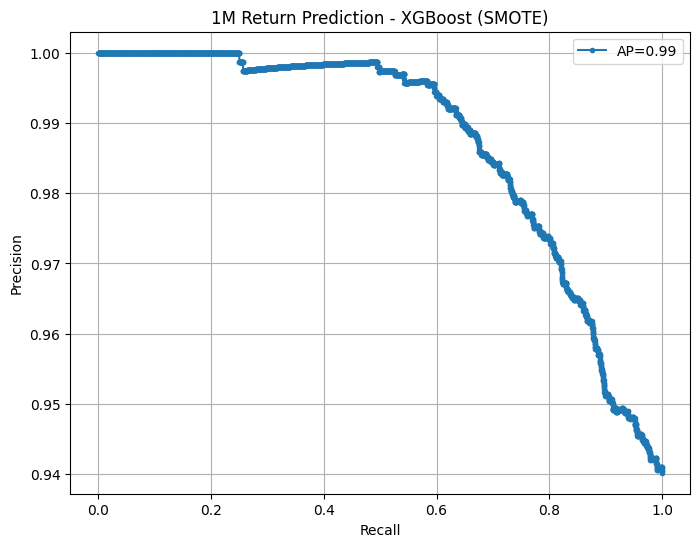

In [56]:
# Example: 12M XGBoost model
plot_precision_recall_curve(trained_models_smote['1m']['XGBoost'], X_test, y_test, title='1M Return Prediction - XGBoost (SMOTE)')


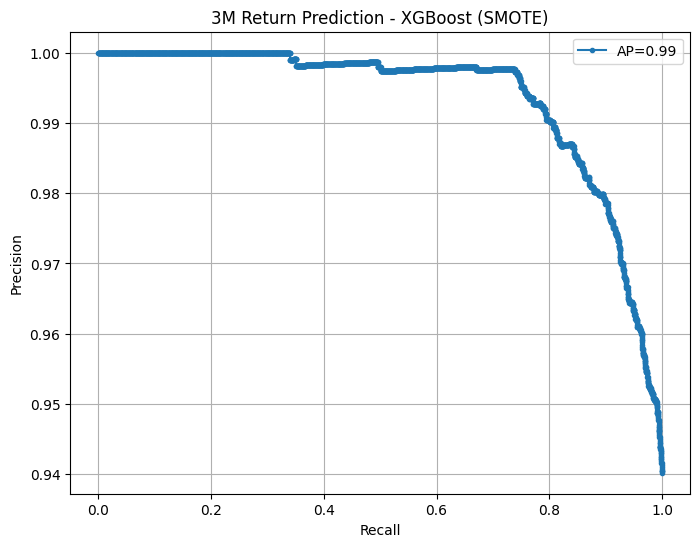

In [57]:
# 3M XGBoost model
plot_precision_recall_curve(trained_models_smote['3m']['XGBoost'], X_test, y_test, title='3M Return Prediction - XGBoost (SMOTE)')


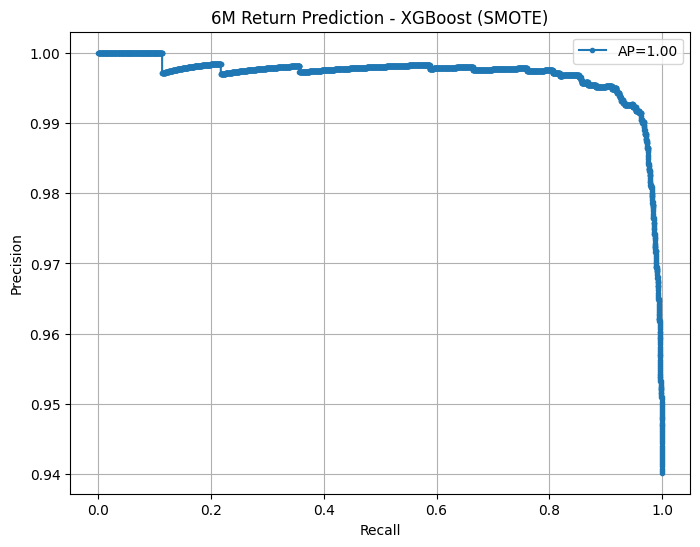

In [58]:
# Example: 6M XGBoost model
plot_precision_recall_curve(trained_models_smote['6m']['XGBoost'], X_test, y_test, title='6M Return Prediction - XGBoost (SMOTE)')


## Confusion Matrix Visualization

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, title='Confusion Matrix'):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()


<Figure size 600x500 with 0 Axes>

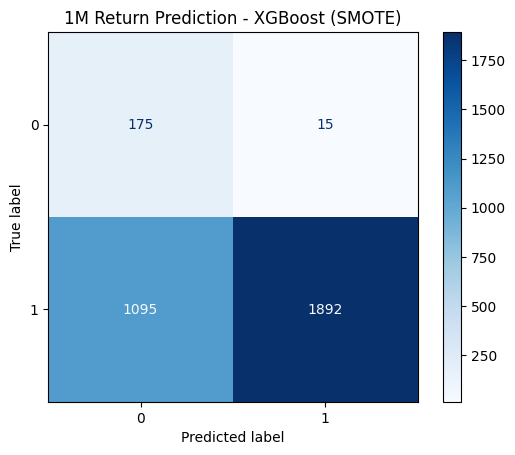

In [60]:
# 12M XGBoost SMOTE
plot_confusion_matrix(trained_models_smote['1m']['XGBoost'], X_test, y_test, title='1M Return Prediction - XGBoost (SMOTE)')


<Figure size 600x500 with 0 Axes>

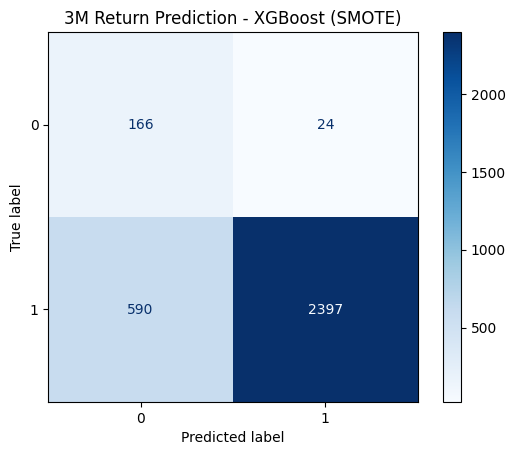

In [61]:
# 3M XGBoost SMOTE
plot_confusion_matrix(trained_models_smote['3m']['XGBoost'], X_test, y_test, title='3M Return Prediction - XGBoost (SMOTE)')


<Figure size 600x500 with 0 Axes>

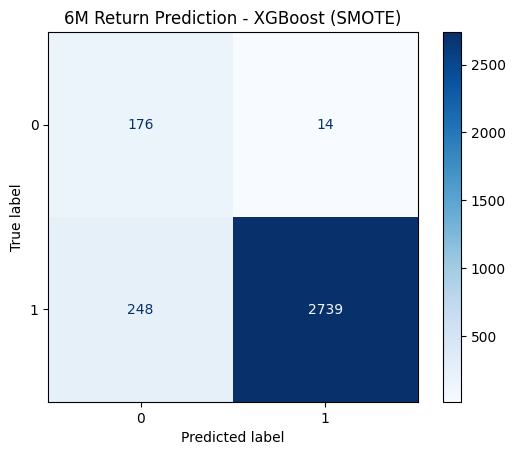

In [62]:
# 6M XGBoost SMOTE
plot_confusion_matrix(trained_models_smote['6m']['XGBoost'], X_test, y_test, title='6M Return Prediction - XGBoost (SMOTE)')


##  Bar Plot for Class Distribution of Predictions

In [63]:
def plot_prediction_distribution(model, X_test, y_test, title='Prediction Distribution'):
    y_pred = model.predict(X_test)
    unique, counts = np.unique(y_pred, return_counts=True)

    plt.figure(figsize=(6, 4))
    plt.bar(['Not Returned (0)', 'Returned (1)'], counts, color=['red', 'green'])
    plt.title(title)
    plt.ylabel('Number of Predictions')
    plt.show()


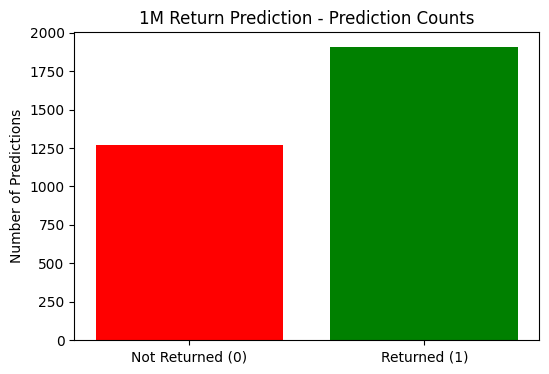

In [64]:
# 1m XGBoost SMOTE
plot_prediction_distribution(trained_models_smote['1m']['XGBoost'], X_test, y_test, title='1M Return Prediction - Prediction Counts')


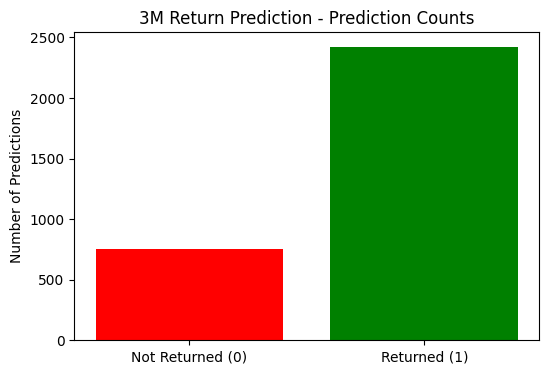

In [65]:
# 3M XGBoost SMOTE
plot_prediction_distribution(trained_models_smote['3m']['XGBoost'], X_test, y_test, title='3M Return Prediction - Prediction Counts')


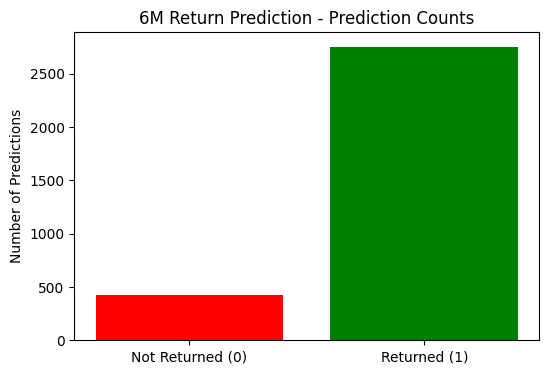

In [66]:
# 6 XGBoost SMOTE
plot_prediction_distribution(trained_models_smote['6m']['XGBoost'], X_test, y_test, title='6M Return Prediction - Prediction Counts')


## Combined PR Curve Comparison

In [67]:
def compare_pr_curves(models_dict, X_test, y_test, title='PR Curve Comparison'):
    plt.figure(figsize=(8, 6))

    for name, model in models_dict.items():
        y_scores = model.predict_proba(X_test)[:,1]
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        avg_precision = average_precision_score(y_test, y_scores)
        plt.plot(recall, precision, marker='.', label=f'{name} (AP={avg_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


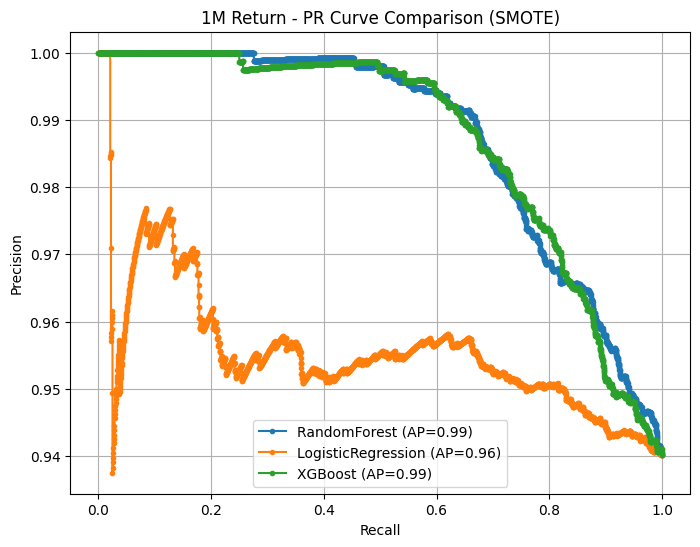

In [68]:
compare_pr_curves(trained_models_smote['1m'], X_test, y_test, title='1M Return - PR Curve Comparison (SMOTE)')


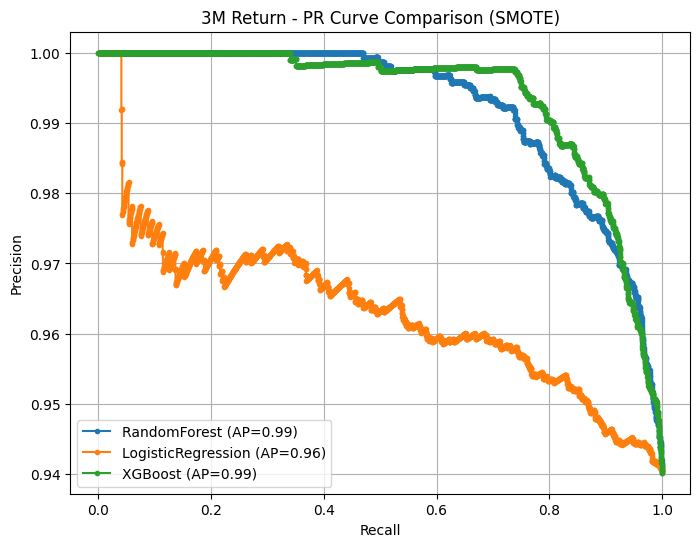

In [69]:
compare_pr_curves(trained_models_smote['3m'], X_test, y_test, title='3M Return - PR Curve Comparison (SMOTE)')


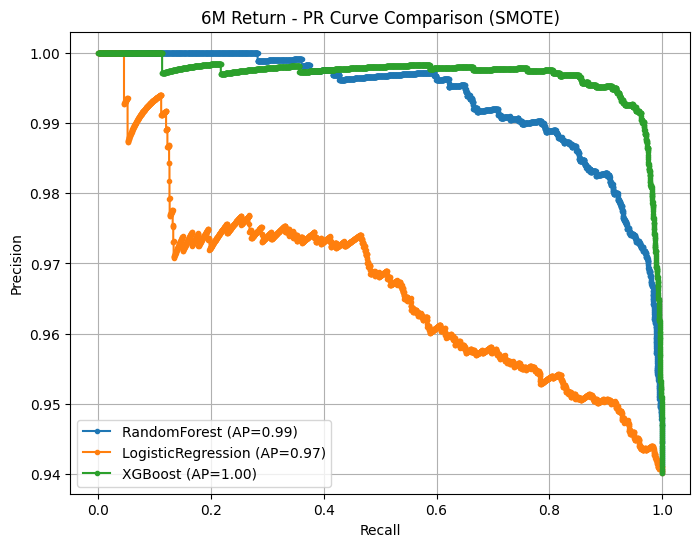

In [70]:
compare_pr_curves(trained_models_smote['6m'], X_test, y_test, title='6M Return - PR Curve Comparison (SMOTE)')


# Getting the requirements for deploying the application

In [71]:
#install streamlit, one time execution
!pip install streamlit joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00


In [72]:
#import streamlit
import streamlit as st

In [73]:
!pip install plotly
!pip install scikit-learn
!pip install xgboost

In [74]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import shap
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import xgboost as xgb

# Load the dataset
data = pd.read_csv('Processed_data_latest.csv', encoding='latin1')

# Dashboard Page
def dashboard():
    try:
        st.image('logo.jpeg', use_container_width=True)
    except FileNotFoundError:
        st.warning("⚠️ Logo image not found. Please upload 'logo.jpeg' to your project directory.")

    st.subheader("💡 Abstract")
    st.write("""
    Islamic Family and Social Services Association (IFSSA) provides food hampers to individuals and families in need.
    This app predicts client retention and supports proactive outreach and planning using machine learning.
    """)

    st.subheader("👨‍💼 Project Purpose")
    st.write("""
    Our goal is to forecast which clients are likely to return for food hamper pickups. This improves outreach, minimizes waste, and supports better planning.
    """)

# EDA Page
def exploratory_data_analysis():
    st.title("📊 IFSSA Client Data Analysis")
    st.markdown("""
    <iframe width="600" height="450" src="https://lookerstudio.google.com/reporting/f21f2db2-6992-4e62-89e1-1d7ac1b699ac" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>
    """, unsafe_allow_html=True)

# Prediction Page Template
def predict_page(month_label, model_file):
    st.title(f"🔮 Predict Client Return for {month_label} Month")
    st.write("Enter client details below:")

    distance = st.slider("Distance from IFSSA (km)", 0, 50, 10)
    pickup_day = st.selectbox("Pickup Day", ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    dependents_qty = st.slider("Number of Dependents", 0, 10, 1)
    age_group = st.selectbox("Age Group", ['0-18', '19-30', '31-45', '46-65', '65+'])
    scheduled_month = st.selectbox("Scheduled Month", list(range(1, 13)))
    scheduled_weekday = st.selectbox("Scheduled Weekday", ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    if st.button("Predict"):
        try:
            model = joblib.load(model_file)
            pickup_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
            age_group_map = {'0-18': 0, '19-30': 1, '31-45': 2, '46-65': 3, '65+': 4}

            input_df = pd.DataFrame([{
                'distance_km': distance,
                'pickup_day': pickup_map[pickup_day],
                'dependents_qty': dependents_qty,
                'age_group_encoded': age_group_map[age_group],
                'scheduled_month': scheduled_month,
                'scheduled_weekday_encoded': pickup_map[scheduled_weekday]
            }])

            prediction = model.predict(input_df)[0]
            proba = model.predict_proba(input_df)[0]
            family_name = data['family_name'].dropna().sample(1).values[0]


            # Probability bar
            fig = go.Figure(go.Bar(
                x=[proba[0], proba[1]],
                y=['Not Return', 'Will Return'],
                orientation='h',
                marker=dict(color=['crimson', 'green'])
            ))
            fig.update_layout(
                title="Prediction Probabilities",
                xaxis_title="Probability",
                yaxis_title="Class",
                xaxis=dict(range=[0, 1]),
                height=300
            )
            st.plotly_chart(fig)

            # Suggestions
            if prediction == 1:
                st.success("✅ The client is likely to return.")
                st.info(f"Suggestion for {family_name}: Continue routine outreach and record future visits.")
            else:
                st.error("❌ The client is unlikely to return.")
                st.warning(f"Suggestion for {family_name}: Consider a follow-up call, support check-in, or sending a reminder message.")

            # SHAP
            explainer = shap.Explainer(model)
            shap_values = explainer(input_df)
            st.subheader("🧠 SHAP Explanation")
            fig, ax = plt.subplots(figsize=(10, 5))
            shap.plots.waterfall(shap_values[0], max_display=6, show=False)
            plt.tight_layout()
            st.pyplot(fig)

        except Exception as e:
            st.error(f"Prediction failed: {e}")

# Thank You Page
def thank_you_page():
    st.title("🙏 Thank You")
    st.write("We appreciate your interest in our project. For more information about IFSSA:")
    st.markdown("[Visit IFSSA Official Website](https://albertamentors.ca/islamic-family-social-services-association-ifssa/)")
    try:
        st.image("IFFSA_Family_2.png", caption="Islamic Family & Social Services Association")
    except:
        st.warning("IFSSA logo image not found.")

# Main App Logic
def main():
    st.sidebar.title("IFSSA Client Retention Prediction")
    app_page = st.sidebar.radio("Select a Page", [
        "Dashboard",
        "EDA",
        "Predicting Return in 1 Month",
        "Predicting Return in 3 Month",
        "Predicting Return in 6 Month",
        "Thank You"
    ])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "EDA":
        exploratory_data_analysis()
    elif app_page == "Predicting Return in 1 Month":
        predict_page("1", "1m_XGBoost_smote.pkl")
    elif app_page == "Predicting Return in 3 Month":
        predict_page("3", "3m_XGBoost_smote.pkl")
    elif app_page == "Predicting Return in 6 Month":
        predict_page("6", "6m_XGBoost_smote.pkl")
    elif app_page == "Thank You":
        thank_you_page()

if __name__ == "__main__":
    main()


Writing app.py


## Install localtunnel

In [75]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 6s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

## Run streamlit in background

In [76]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.16.245.90


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [77]:
!npx localtunnel --port 8501

⠙your url is: https://deep-areas-begin.loca.lt
^C


# Generating the Requirements.txt file

In [78]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0f0d84ff516d2ebdd63ec5320bc8b8bcfc5cb1c1ce756dc30ad8ea5b8022185f
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [79]:
!pipreqs #(to create a new requirements.txt file) Delete current file
# download scikit too
!pipreqs install scikit-learn
# import plotly too #(to create a new requirements.txt file) Delete current file
#!pipreqs --force #(to replace existing requirements.txt file)

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt
Usage:
    pipreqs [options] [<path>]


In [80]:
!pip freeze > requirements .txt